<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_2_8)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,28.675021,56.311127,0.001011,94.987158,94.986291,0.000867
1,0.0,1.0,56.118082,93.012180,0.003399,159.133661,159.130132,0.003529
2,0.0,2.0,29.233277,36.007090,0.005720,75.246087,75.240606,0.005481
3,0.0,3.0,59.082882,21.562925,0.015487,90.661294,90.646010,0.015284
4,0.0,4.0,39.681539,93.338761,0.000177,143.020478,143.020227,0.000250
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,47.803480,30.880108,-0.002192,88.681395,88.684272,-0.002877
249996,999.0,246.0,36.277329,54.421469,-0.001951,100.696847,100.699307,-0.002461
249997,999.0,247.0,72.906295,38.630265,-0.009341,121.527219,121.536707,-0.009488
249998,999.0,248.0,42.948901,50.029213,-0.000849,102.977264,102.978580,-0.001316


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    28.675021  56.311127  0.001011   94.987158   94.986291  0.000867
      1.0    56.118082  93.012180  0.003399  159.133661  159.130132  0.003529
      2.0    29.233277  36.007090  0.005720   75.246087   75.240606  0.005481
      3.0    59.082882  21.562925  0.015487   90.661294   90.646010  0.015284
      4.0    39.681539  93.338761  0.000177  143.020478  143.020227  0.000250
...                ...        ...       ...         ...         ...       ...
999.0 245.0  47.803480  30.880108 -0.002192   88.681395   88.684272 -0.002877
      246.0  36.277329  54.421469 -0.001951  100.696847  100.699307 -0.002461
      247.0  72.906295  38.630265 -0.009341  121.527219  121.536707 -0.009488
      248.0  42.948901  50.029213 -0.000849  102.977264  102.978580 -0.001316
      249.0  60.887959  94.065718  0.000695  164.954372  164.953162  0.001210

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    28.675021  56.311127  0.001011   94.987158   94.986291  0.000867
      1.0    56.118082  93.012180  0.003399  159.133661  159.130132  0.003529
      2.0    29.233277  36.007090  0.005720   75.246087   75.240606  0.005481
      3.0    59.082882  21.562925  0.015487   90.661294   90.646010  0.015284
      4.0    39.681539  93.338761  0.000177  143.020478  143.020227  0.000250
...                ...        ...       ...         ...         ...       ...
999.0 245.0  47.803480  30.880108 -0.002192   88.681395   88.684272 -0.002877
      246.0  36.277329  54.421469 -0.001951  100.696847  100.699307 -0.002461
      247.0  72.906295  38.630265 -0.009341  121.527219  121.536707 -0.009488
      248.0  42.948901  50.029213 -0.000849  102.977264  102.978580 -0.001316
      249.0  60.887959  94.065718  0.000695  164.954372  164.953162  0.001210

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,28.675021,56.311127,0.001011,94.987158,94.986291,0.000867
1,0.0,1.0,56.118082,93.012180,0.003399,159.133661,159.130132,0.003529
2,0.0,2.0,29.233277,36.007090,0.005720,75.246087,75.240606,0.005481
3,0.0,3.0,59.082882,21.562925,0.015487,90.661294,90.646010,0.015284
4,0.0,4.0,39.681539,93.338761,0.000177,143.020478,143.020227,0.000250
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,47.803480,30.880108,-0.002192,88.681395,88.684272,-0.002877
249996,999.0,246.0,36.277329,54.421469,-0.001951,100.696847,100.699307,-0.002461
249997,999.0,247.0,72.906295,38.630265,-0.009341,121.527219,121.536707,-0.009488
249998,999.0,248.0,42.948901,50.029213,-0.000849,102.977264,102.978580,-0.001316


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    28.675021  56.311127  0.001011   94.987158   94.986291  0.000867
      1.0    56.118082  93.012180  0.003399  159.133661  159.130132  0.003529
      2.0    29.233277  36.007090  0.005720   75.246087   75.240606  0.005481
      3.0    59.082882  21.562925  0.015487   90.661294   90.646010  0.015284
      4.0    39.681539  93.338761  0.000177  143.020478  143.020227  0.000250
...                ...        ...       ...         ...         ...       ...
999.0 245.0  47.803480  30.880108 -0.002192   88.681395   88.684272 -0.002877
      246.0  36.277329  54.421469 -0.001951  100.696847  100.699307 -0.002461
      247.0  72.906295  38.630265 -0.009341  121.527219  121.536707 -0.009488
      248.0  42.948901  50.029213 -0.000849  102.977264  102.978580 -0.001316
      249.0  60.887959  94.065718  0.000695  164.954372  164.953162  0.001210

[250000 rows x 6 columns]

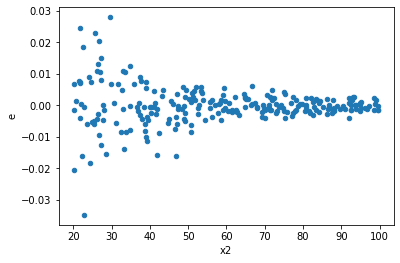

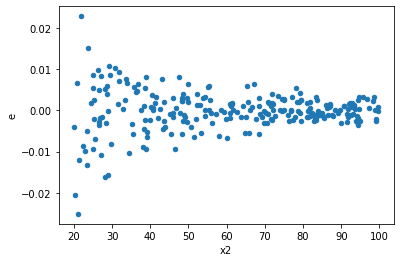

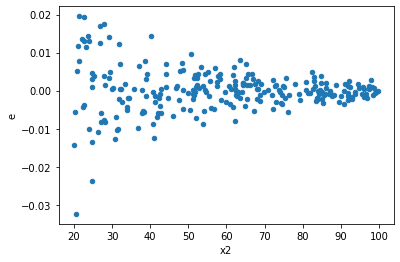

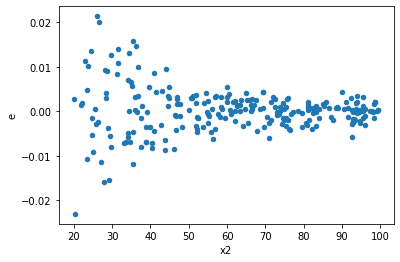

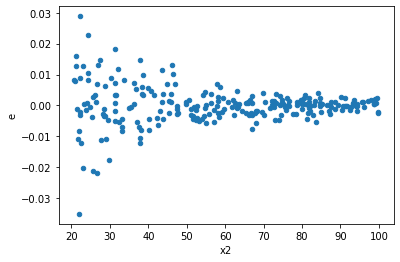

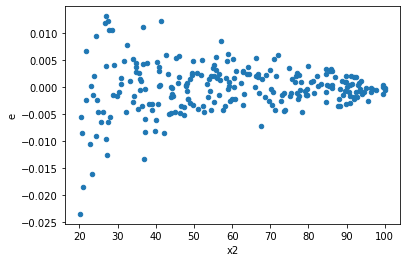

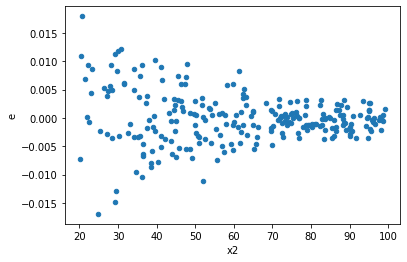

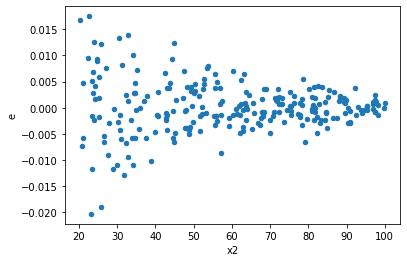

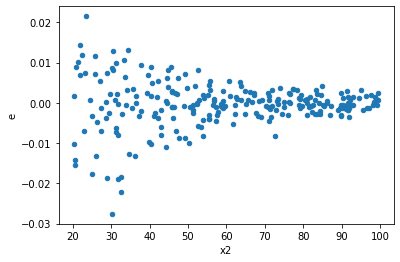

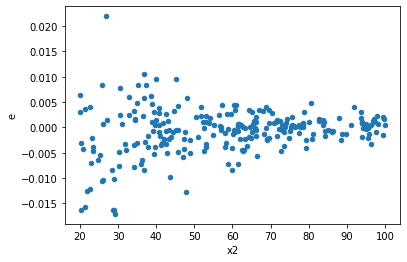

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,107.0,139.0,0.0006116219133636561,0.004891064579357792,5.7160926482584685e-06,3.518751495940858e-05,6.155868549494071,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
4.0,111.0,135.0,0.002476502607316929,0.007065523188871184,2.2310834300152514e-05,5.233720880645322e-05,2.345820335642735,2.644837962861857e-06,0.9999986775810186,1.3224189814309284e-06,Reject005=0 : Heteroscedasticity
6.0,128.0,118.0,0.0008393874433460775,0.0049768730400177675,6.557714401141231e-06,4.21768901696421e-05,6.431644867349226,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
7.0,122.0,124.0,0.002442842912141551,0.004060268538986438,2.00233025585373e-05,3.274410112085837e-05,1.635299722667244,0.006719297218174436,0.9966403513909128,0.003359648609087218,Reject005=0 : Heteroscedasticity
9.0,130.0,116.0,0.002473851348679127,0.006342607964469837,1.9029625759070205e-05,5.4677654866119284e-05,2.873291128179856,1.6233260735631916e-08,0.9999999918833696,8.116630367815958e-09,Reject005=0 : Heteroscedasticity
12.0,133.0,113.0,0.0037303283720571006,0.004794154518331302,2.804758174479023e-05,4.242614617992302e-05,1.5126489893483803,0.02399164982161528,0.9880041750891924,0.01199582491080764,Reject005=0 : Heteroscedasticity
13.0,127.0,119.0,0.0005749311918722089,0.00595198313369158,4.527017258836291e-06,5.001666498900487e-05,11.048481180710606,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
14.0,121.0,125.0,0.0005466203831120154,0.009233282729471909,4.5175238273720275e-06,7.386626183577527e-05,16.351050854057227,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
15.0,111.0,135.0,0.0005664419940740981,0.004234851768896774,5.103081027694577e-06,3.1369272362198323e-05,6.147124098550722,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,133.0,113.0,0.003221793699014926,0.002735731014589552,2.4224012774548316e-05,2.42100089786686e-05,0.999421904371912,0.993538164227021,Reject005=1 : Homoscedasticity
1.0,107.0,139.0,0.0006116219133636561,0.004891064579357792,5.7160926482584685e-06,3.518751495940858e-05,6.155868549494071,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,127.0,119.0,0.0074344718386738,0.0007240352773470256,5.853914833601418e-05,6.0843300617397105e-06,0.10393608780940426,4.69674457042481e-31,Reject005=0 : Heteroscedasticity
3.0,121.0,125.0,0.00468669512931117,0.0025965373434547944,3.873301759761297e-05,2.0772298747638356e-05,0.5362943564954388,0.0006406646990093381,Reject005=0 : Heteroscedasticity
4.0,111.0,135.0,0.002476502607316929,0.007065523188871184,2.2310834300152514e-05,5.233720880645322e-05,2.345820335642735,2.644837962861857e-06,Reject005=0 : Heteroscedasticity
5.0,144.0,102.0,0.005510606505909784,0.0016945543461253875,3.826810073548461e-05,1.6613277903190072e-05,0.43412862368121624,4.1569183556455515e-06,Reject005=0 : Heteroscedasticity
6.0,128.0,118.0,0.0008393874433460775,0.0049768730400177675,6.557714401141231e-06,4.21768901696421e-05,6.431644867349226,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,122.0,124.0,0.002442842912141551,0.004060268538986438,2.00233025585373e-05,3.274410112085837e-05,1.635299722667244,0.006719297218174436,Reject005=0 : Heteroscedasticity
8.0,112.0,134.0,0.0036413366711808915,0.0030196921664304936,3.25119345641151e-05,2.2535016167391743e-05,0.6931305832617128,0.04566672089485317,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    727
Reject005=1 : Homoscedasticity      273
Name: Result_test, dtype: int64